<h2><font color='maroon'><center><u>Insurance Claims- Fraud Detection

<h2><font color='grey'><center><u>Project 

### Problem Statement:
#### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

#### Solution:
- Looking at the problem statement, this seems to be a simple Classification problem, where the "Fraud reported" column will be the target label where its a simple binary classification of Y/N?
- Let us look at the dataset for further inferences.

# Summary



- Analysed the Dataset
- Removed columns with null columns
- Conducted EDA using visualisation.
- Seperated Categorical and numerical values, with a threshold of unique values set to 40
- Conducted a K best feature approach to verify findings
- used 20 features to predict the the target column.
- the dataset was also imbalanced, used SMOTE to oversample
- Found the best model and random state value with an accuracy score of about 85.71% 
- started Hyper parameter tuning
- The final accuracy score for found to be : 86.22%
- Attached Classification report below.

In [137]:
print(classification_report(test_y, RSCV_pred_y))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       155
           1       0.68      0.78      0.73        41

    accuracy                           0.88       196
   macro avg       0.81      0.84      0.82       196
weighted avg       0.89      0.88      0.88       196



## Python Implementation:

In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#encoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#metrics
from sklearn.metrics import r2_score,accuracy_score,f1_score,confusion_matrix, classification_report

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix
import pandas_profiling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


In [140]:
data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv",header=0)


In [3]:
data.shape

(1000, 40)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [6]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [8]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


### Inferences:
- There are 40 Columns incuding the target column. and 100 records.
- "_c39" is an empty column. and can be removed. Apart from this there, there arent any null values
- There are although "?" and "0" that may have to be attended to.
- There are float64(columns=2), int64(columns=17), object(columns=21). although we'll have to determine how many of the columns are categorical. numerical.
- "Policy Number" is nominal data.
- 'insured_zip ' and 'incident location' have almost all unique values and maynot contribute to the classification problem. we will confirm with best feature selection.
- Looking at the columns we can set a threshold for feature selection as 40, for feature seperation.

## Exploratory Data Analysis(EDA)

- Let us first begin with  by seperating the catagorical and numerical columns.
- Then let us visualise each of them seperately.
- let us also check if the dataset has a balanced readings of both Y/N cases of the target label
- Lets check the correlation and then then begin preprocessing.

In [141]:
# Dropping empty column 
data.drop('_c39',axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>],
       [<AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>],
       [<AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>],
       [<AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>,
        <A

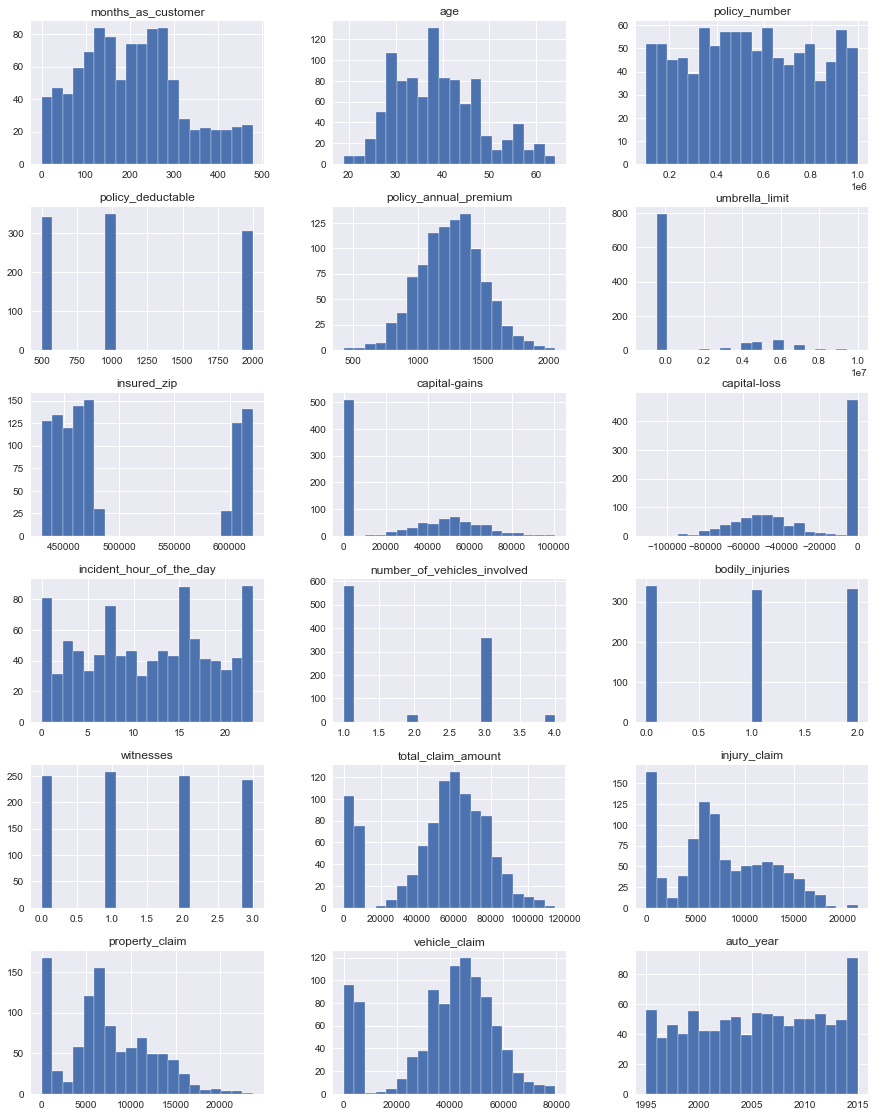

In [142]:
data.hist(figsize=(15,30),grid=True,layout=(9,3),bins=20)

In [143]:
#User Defined Function to Seperate Catagorical and Numerical data Columns based on number of unique values.
def num_cat(df):
    num=[]
    cat=[]
    count=df.nunique()
    for i in df.columns:
        if count[i]>40:
            num.append(i)
        else:
            cat.append(i)
    return(num,cat)

In [144]:
numer_cols=num_cat(data)[0]
cat_cols=num_cat(data)[1]
print(f'Numerical data columns: \n',num_cat(data)[0])
print(f'\n\n Categorical data columns: \n',num_cat(data)[1])

Numerical data columns: 
 ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_annual_premium', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_date', 'incident_location', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']


 Categorical data columns: 
 ['policy_state', 'policy_csl', 'policy_deductable', 'umbrella_limit', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported']


In [14]:
data[num_cat(data)[0]].dtypes

months_as_customer         int64
age                        int64
policy_number              int64
policy_bind_date          object
policy_annual_premium    float64
insured_zip                int64
capital-gains              int64
capital-loss               int64
incident_date             object
incident_location         object
total_claim_amount         int64
injury_claim               int64
property_claim             int64
vehicle_claim              int64
dtype: object

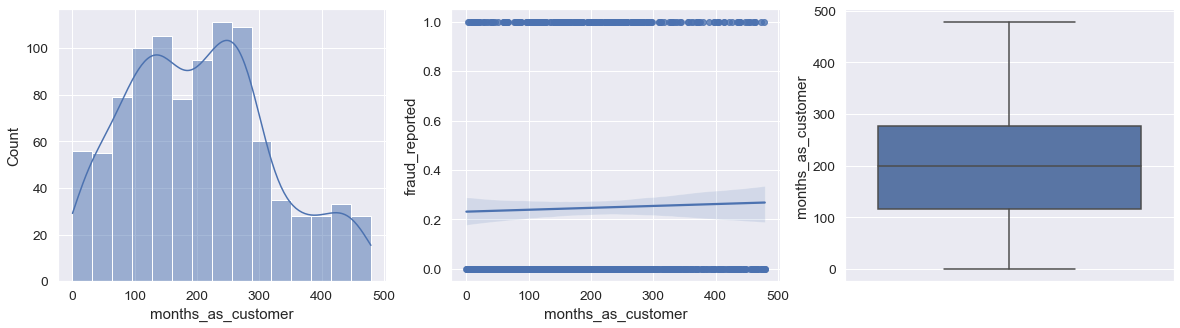

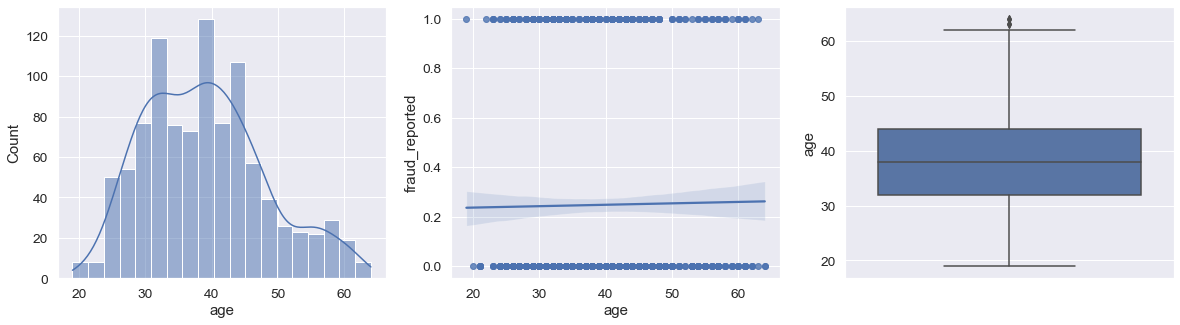

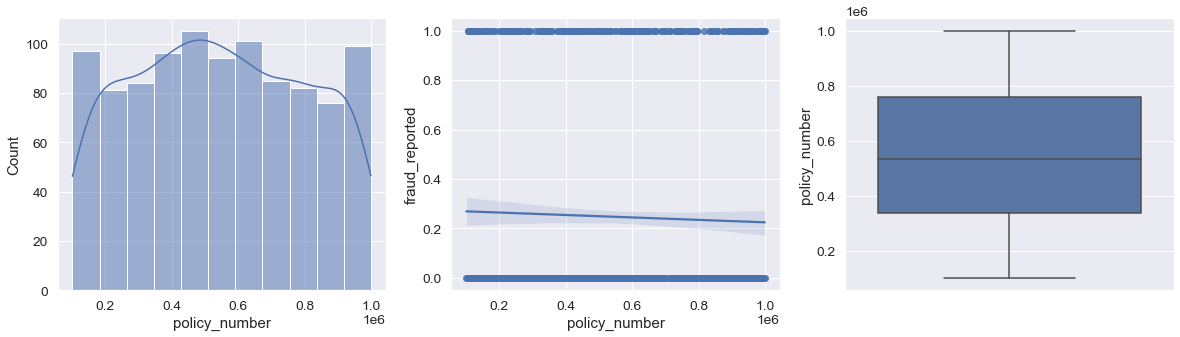

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

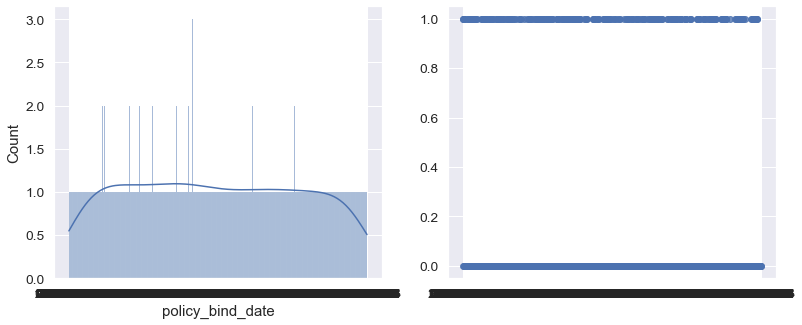

In [24]:
#User ddefined function for plotting Numerical Data Columns
for i in data[numer_cols].columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=data,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y=data.fraud_reported,data=data)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=data)
    plt.show()

### Inference
-  It is clear that none of the numerical columns, except 'vehicle_claim', 'property_claim','injust claim','total_claim_amount' have any relationship with the target.
- there are outliers that have to be dealth with.

In [148]:
#Lets make a function to visualize categorical data
def Discrete_plots(dfrme, feature_c,invert_axis = False, label = "fraud_reported"):
    fig, ax = plt.subplots(ncols= 2, figsize = (12,4))
    if invert_axis == False:
        sns.barplot(x = feature_c, y = label ,data=dfrme,ci=None)
    else:
        sns.barplot(y = feature_c, x = label ,data=dfrme,ci=None)
        
    if invert_axis == False:
        sns.countplot(x = feature_c, data=dfrme,hue="fraud_reported",ax=ax[0])
    else:
        sns.countplot(y = feature_c, data=dfrme,hue="fraud_reported",ax=ax[0])
        
    ax[0].set_title("Relationship between " + feature_c + " vs " + label)    
    ax[1].set_title("Fraud Rate by {}".format(feature_c))
    ax[1].set_ylabel("Average(fraud_reported)")
    plt.tight_layout()

    plt.show()

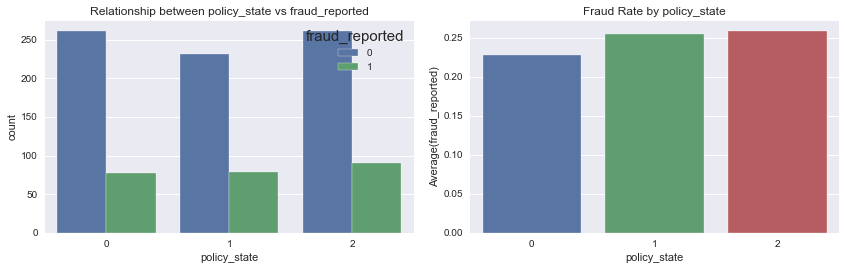

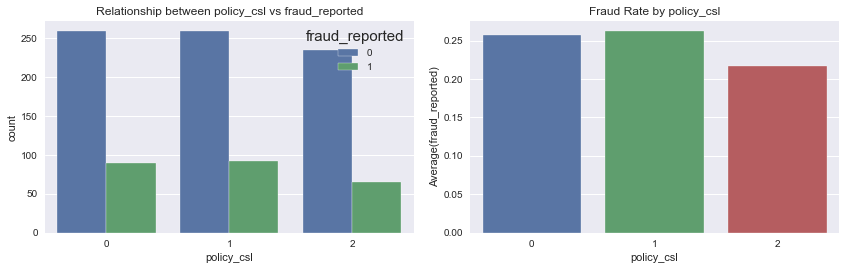

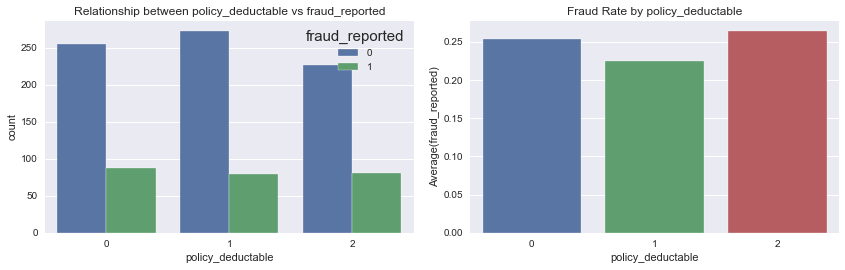

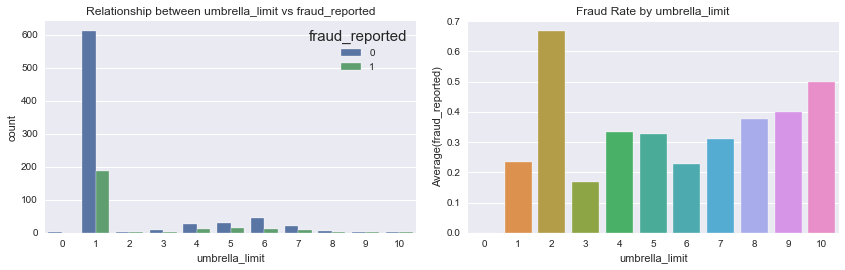

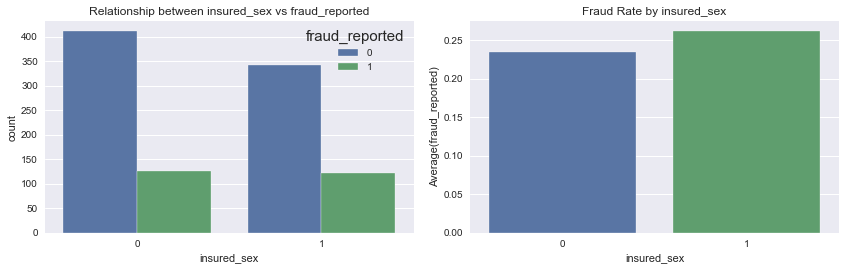

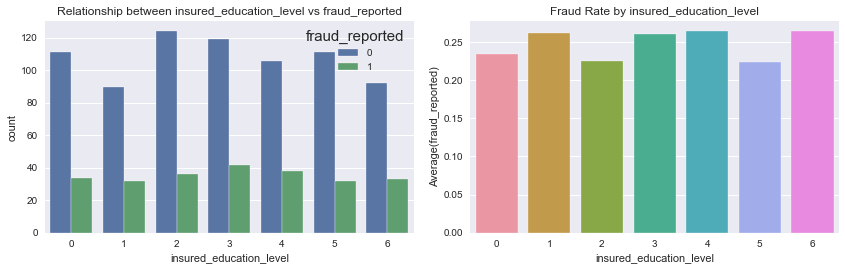

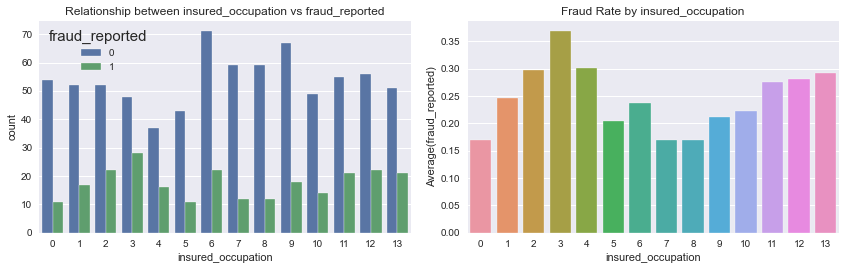

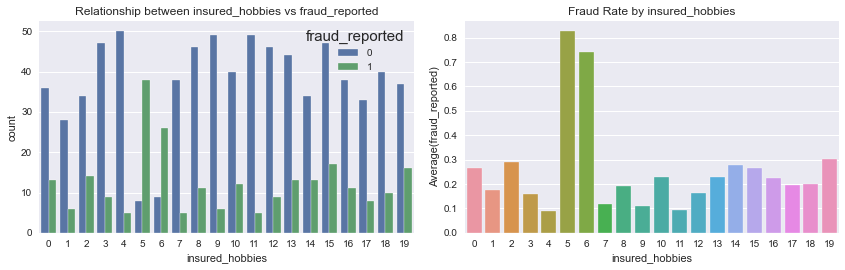

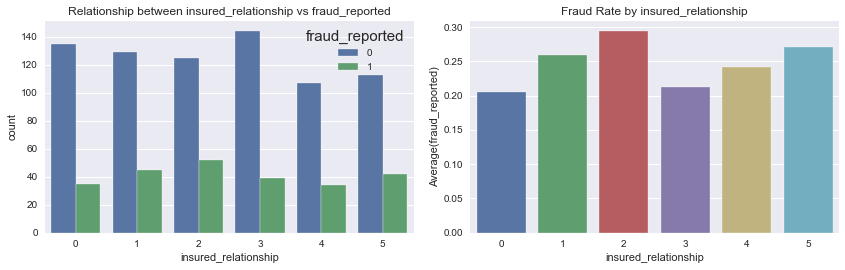

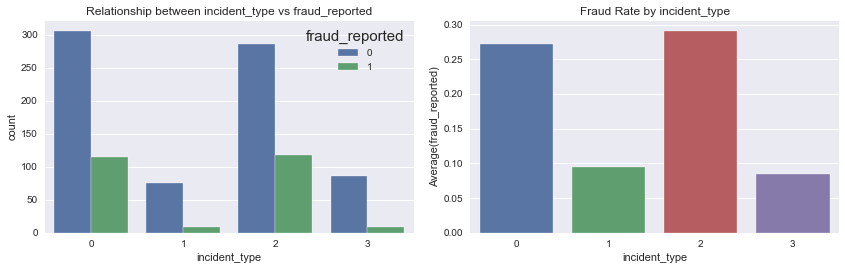

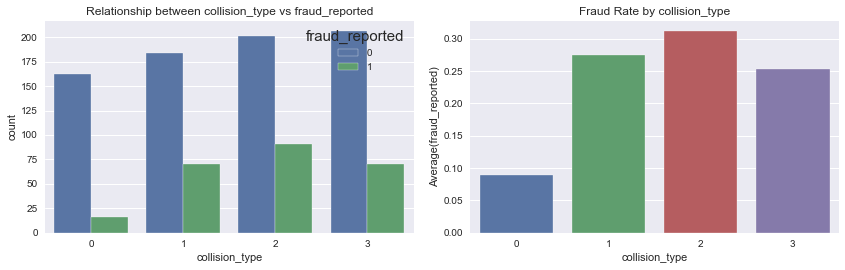

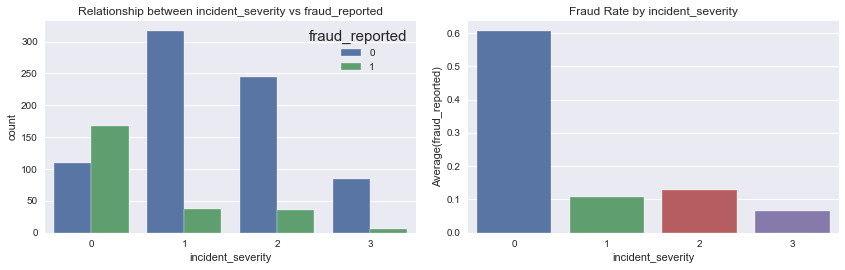

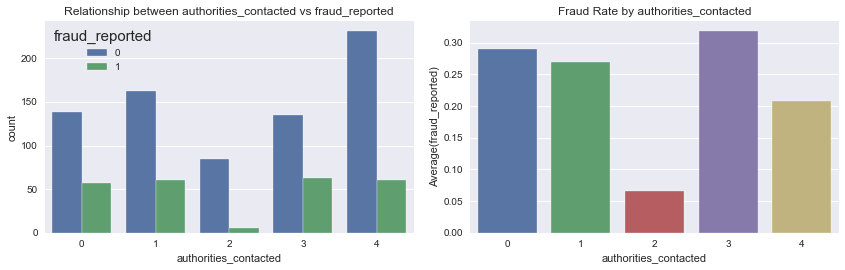

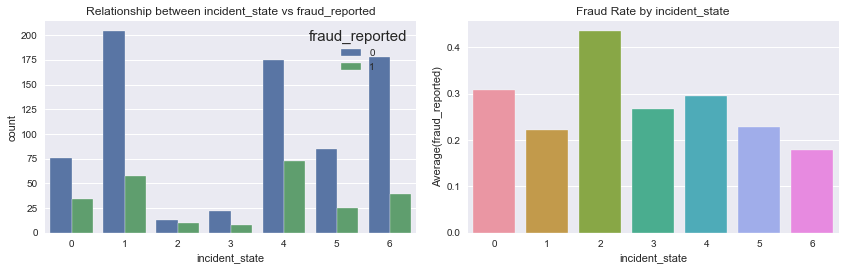

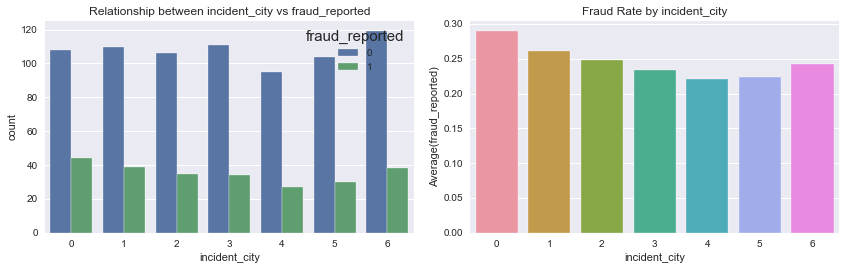

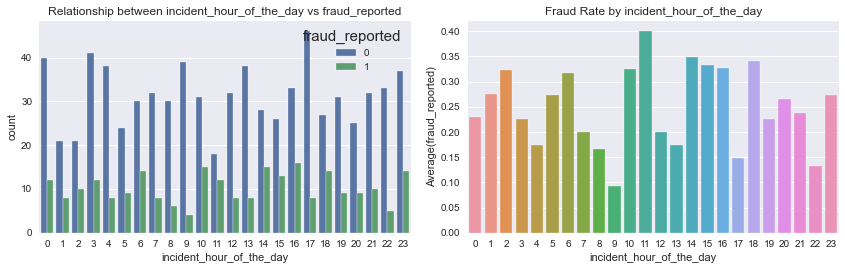

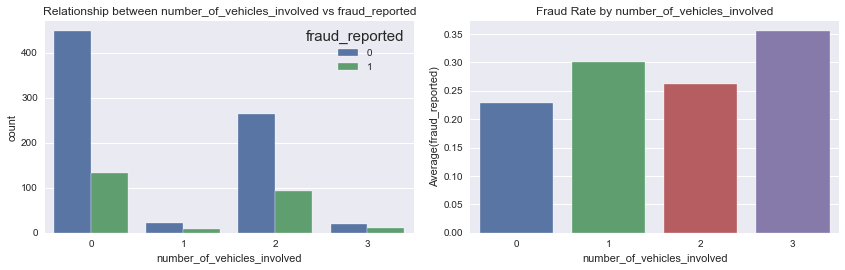

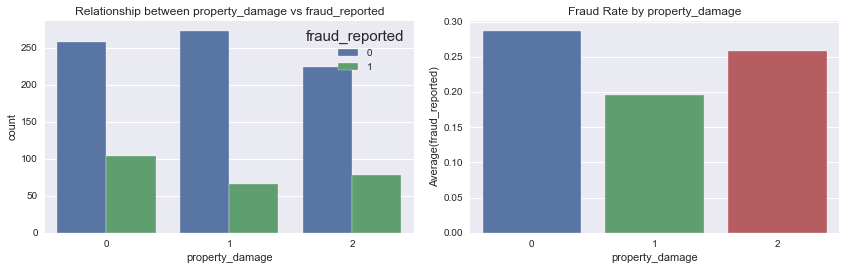

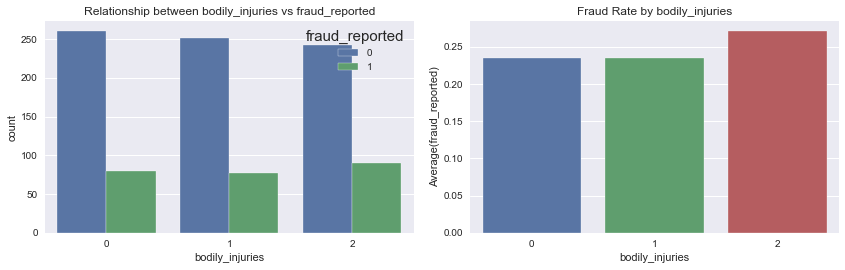

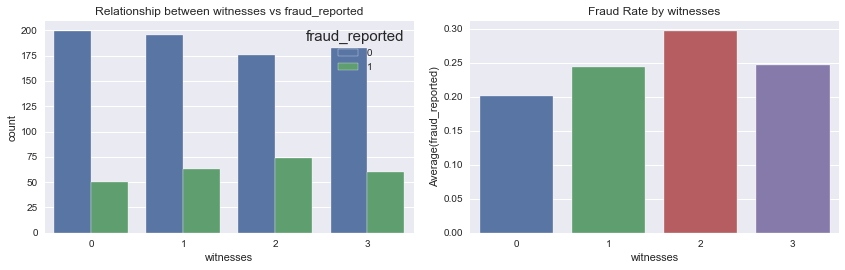

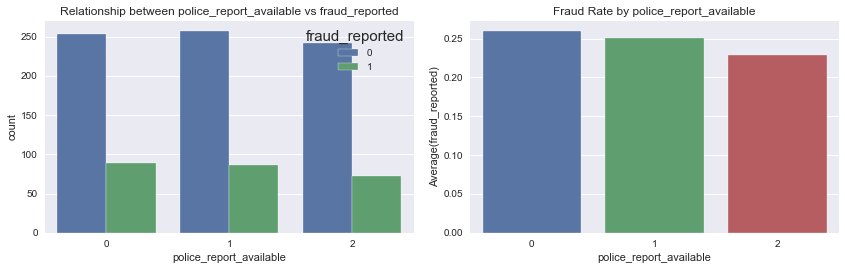

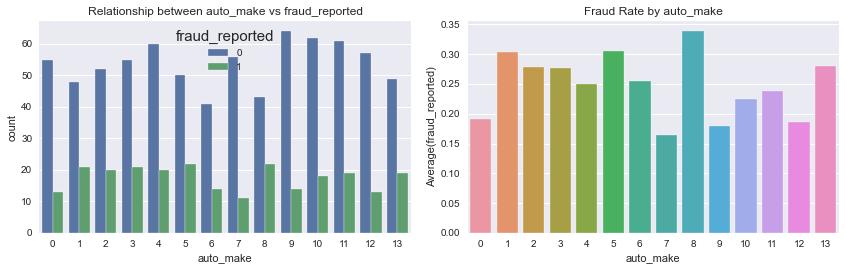

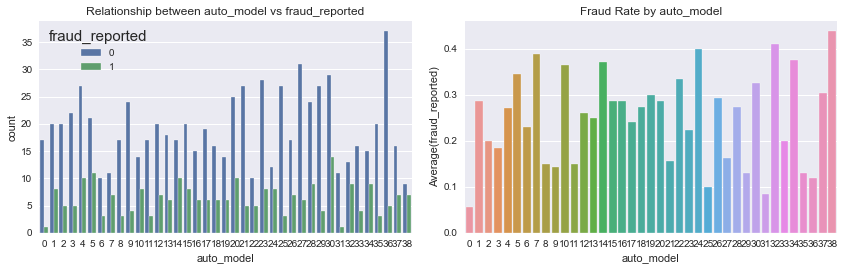

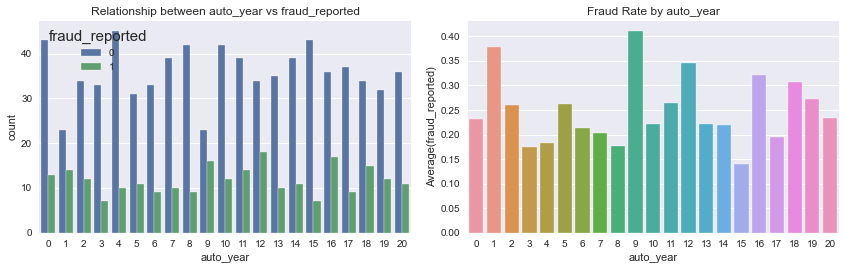

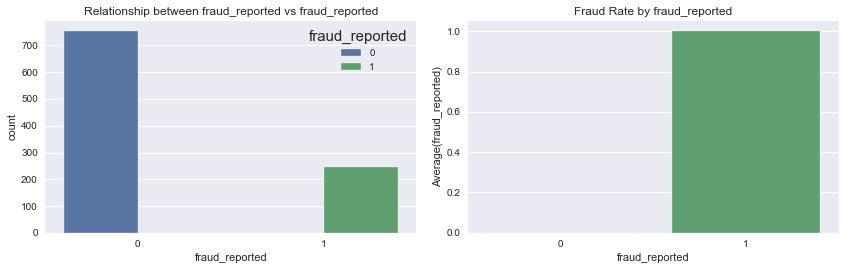

In [149]:
for i in data[cat_cols].columns:
    Discrete_plots(data[cat_cols],feature_c=i)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

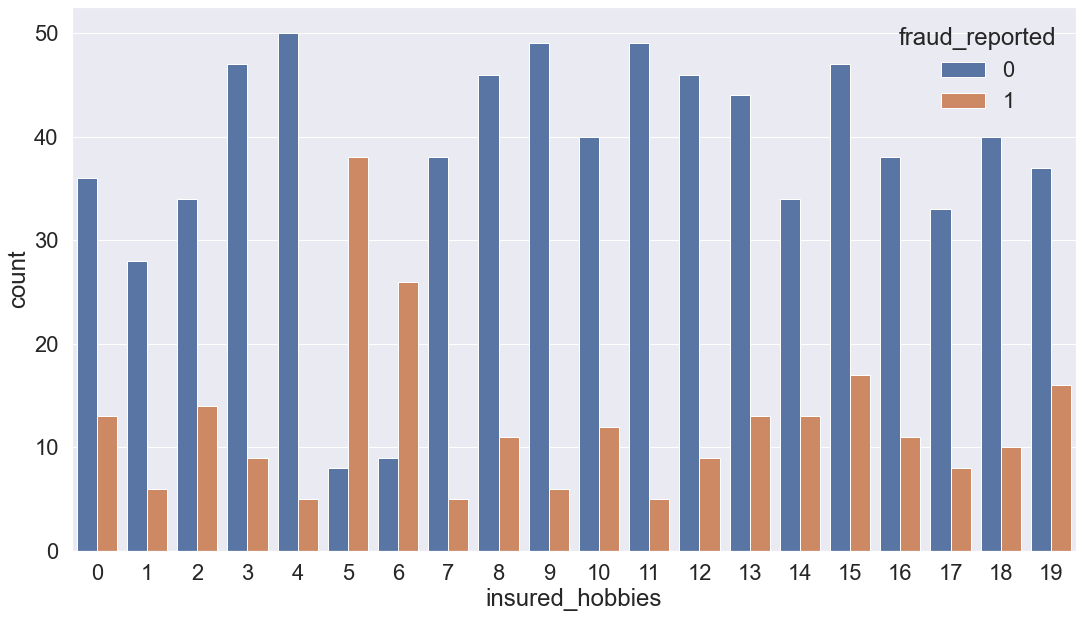

In [155]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(18, 10))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

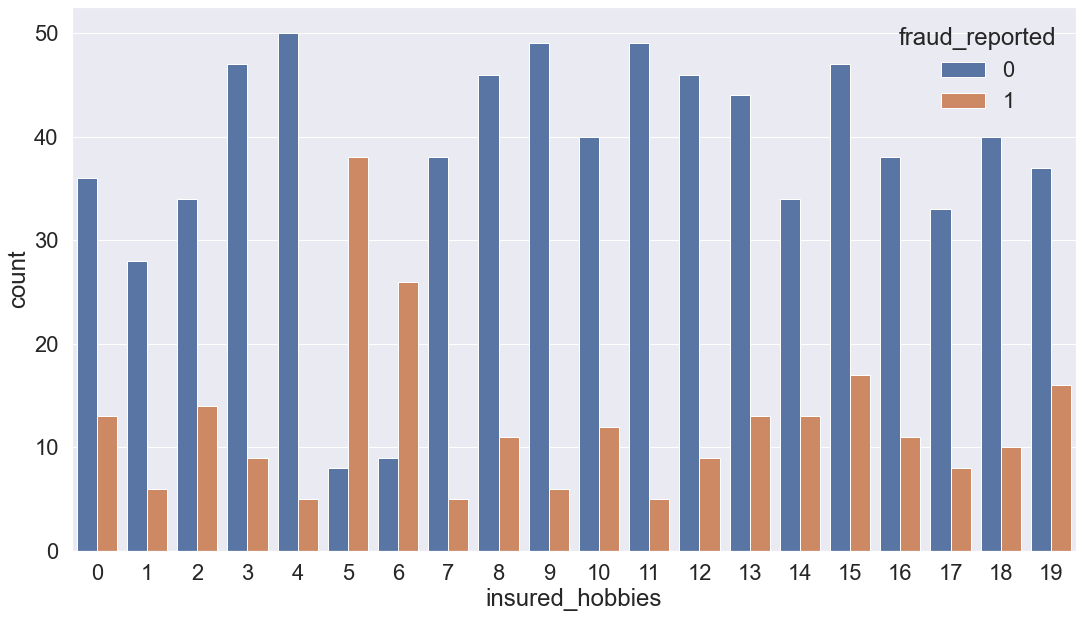

In [156]:
f, ax = plt.subplots(figsize=(18, 10))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

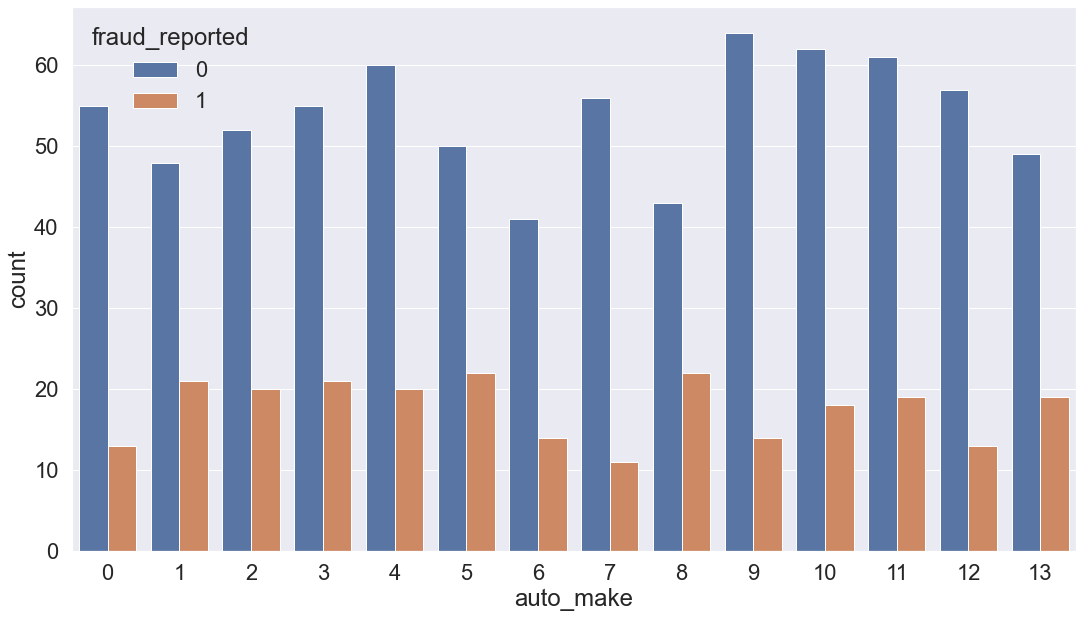

In [157]:
f, ax = plt.subplots(figsize=(18, 10))
sns.countplot(x='auto_make',hue='fraud_reported',data=data)

<AxesSubplot:>

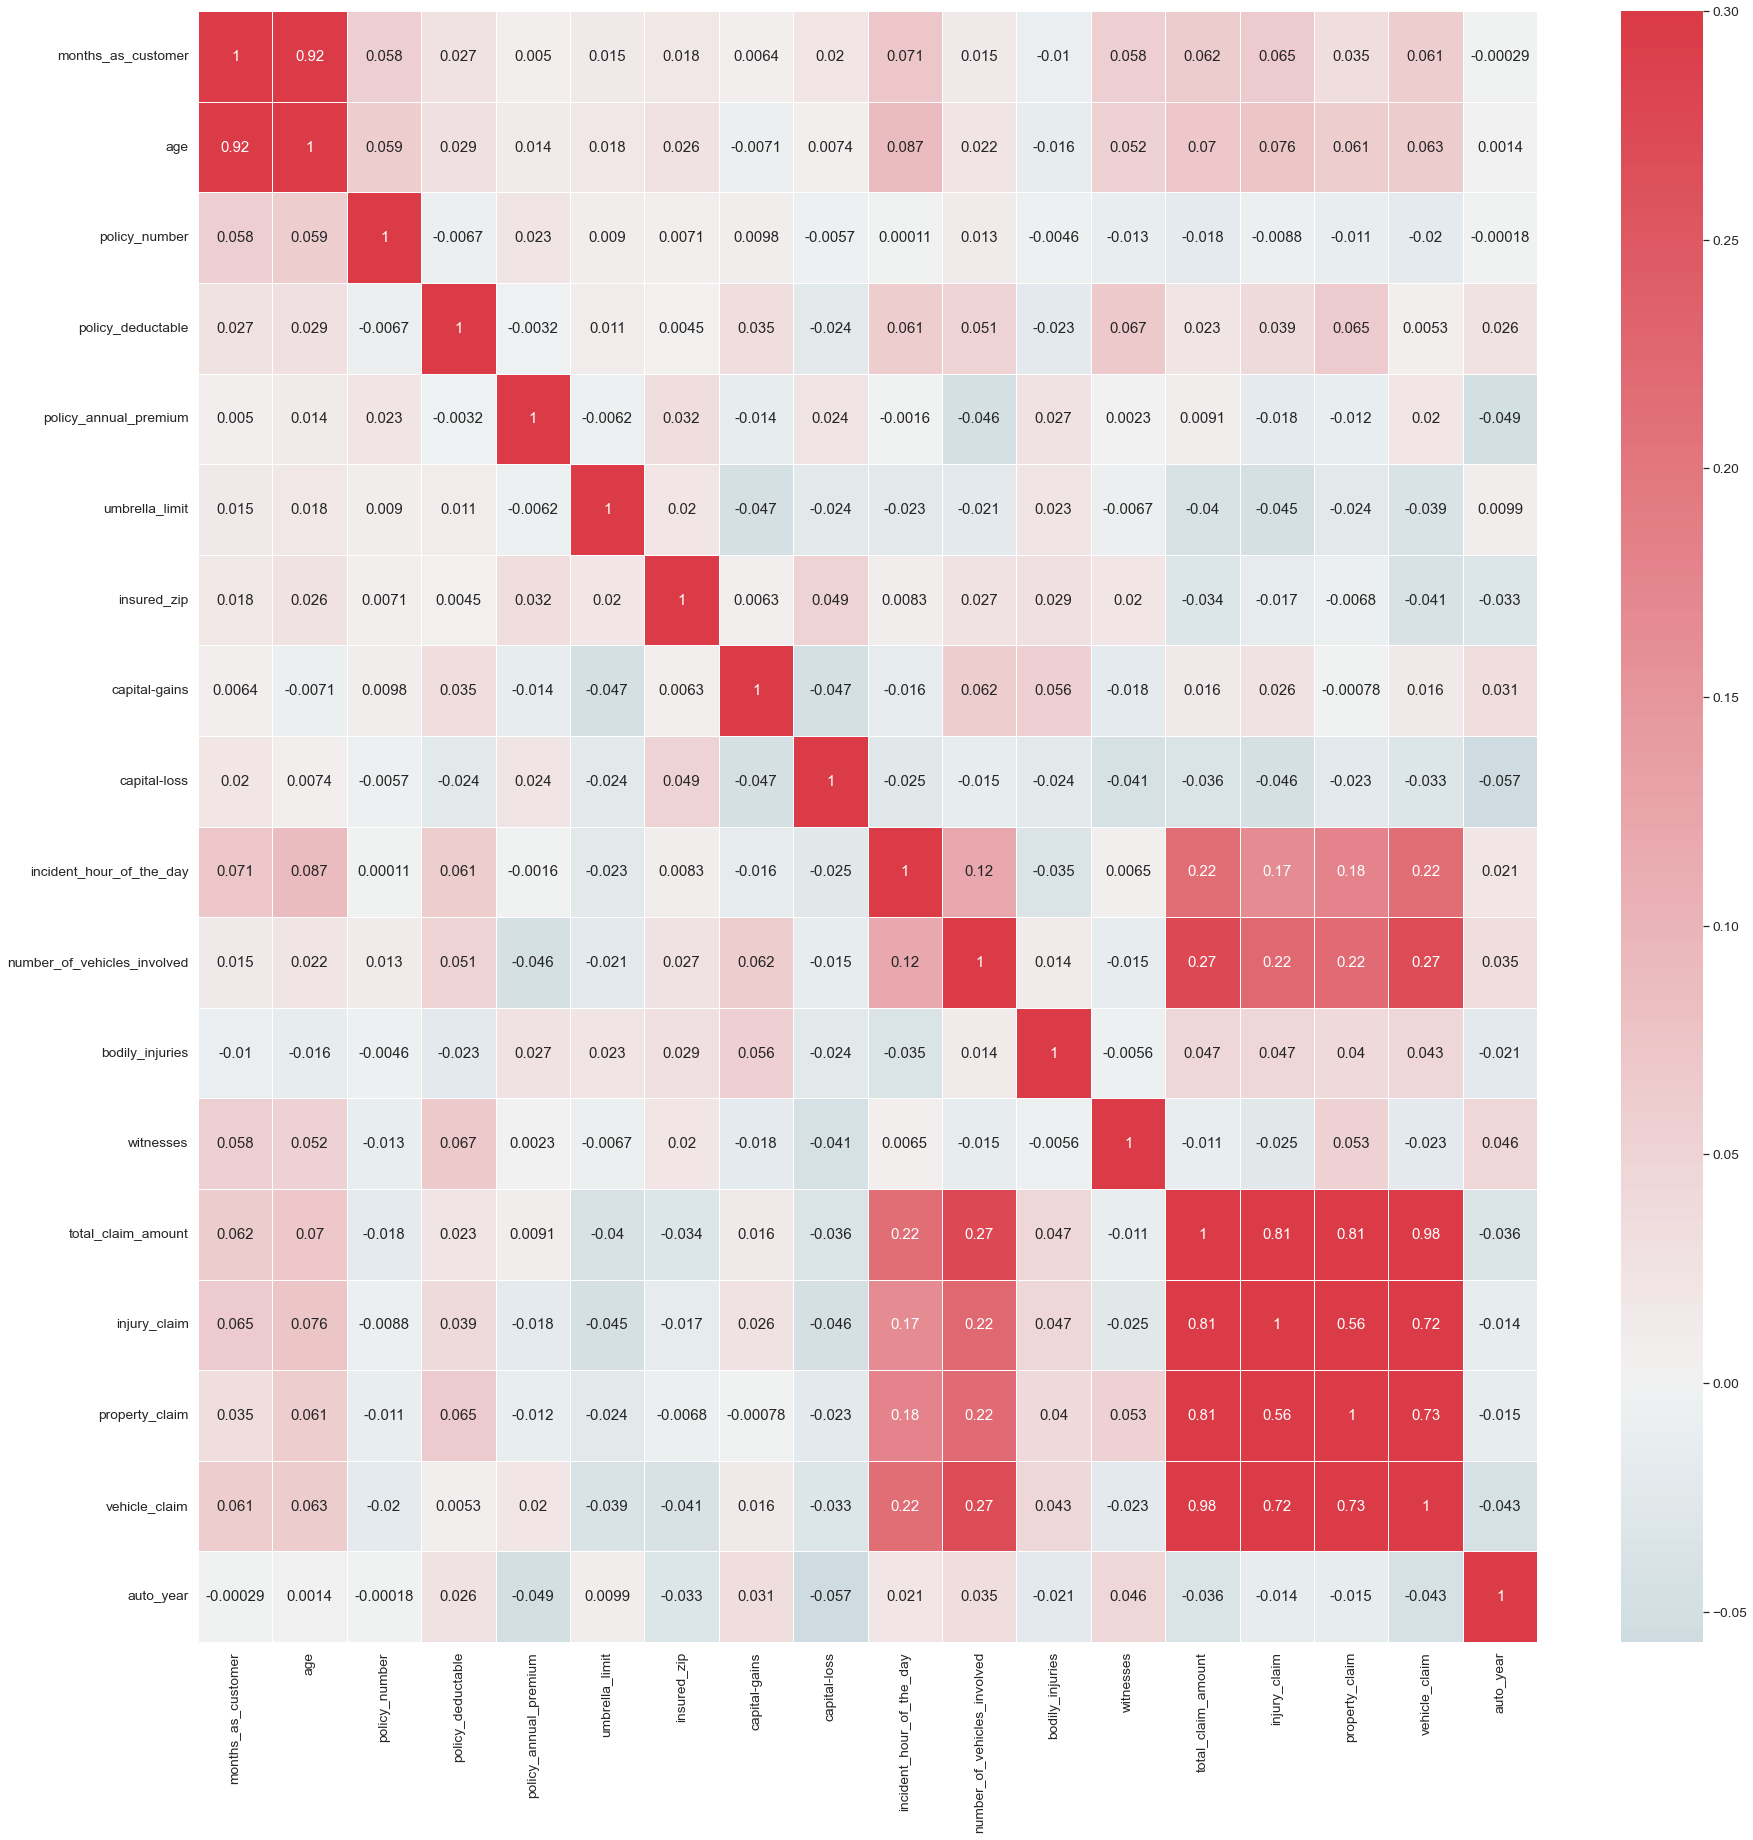

In [20]:
sns.set(style="white")
sns.set(font_scale=1.25)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,annot=True, linewidths=.5)

#### Inferences:
- We can see that total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim' are correlated not only with the target, but also with each other.
-  same with 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day','number_of_vehicles_involved. they are correlated with each other
- 'collision_type', 'incident_severity' is correlated with the target.
- Rest of the features have low correlation.
- These findings were also suggestive in the scatterplot. which means we can consider dropping the other numerical data columns.

## Pre Processing

In [147]:
#lets do Lable enconding coding to make more features 

LE = LabelEncoder()
LE_count = 0

# Iterate through the columns
for col in data[num_cat(data)[1]]:
    
    data[col] = LE.fit_transform(data[col])
            
            
           
    LE_count += 1
            
print('%d Catagorical Columns were label encoded.' % LE_count)

25 Catagorical Columns were label encoded.


In [22]:
data[num_cat(data)[1]]

,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,fraud_reported
0,2,1,1,1,1,4,2,17,0,2,3,0,4,4,1,5,0,2,1,2,2,10,1,9,1
1,1,1,2,5,1,4,6,15,2,3,0,1,4,5,5,8,0,0,0,0,0,8,12,12,1
2,2,0,2,5,0,6,11,2,3,0,2,1,4,1,1,7,2,1,2,3,1,4,30,12,0
3,0,1,2,6,0,6,1,2,4,2,1,0,4,2,0,5,0,0,1,2,1,3,34,19,1
4,0,2,1,6,1,0,11,2,4,3,0,1,2,1,0,20,0,1,0,1,1,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,1,1,0,5,2,13,4,2,1,1,1,0,4,20,0,2,0,1,0,6,6,11,0
996,0,0,1,1,0,6,9,17,5,2,2,0,1,4,3,23,0,2,2,3,0,13,28,20,0
997,2,1,0,3,0,5,1,3,2,0,3,1,4,0,0,4,2,0,2,3,2,11,19,1,0
998,0,2,2,5,1,0,5,0,5,2,2,0,3,1,0,2,0,0,0,1,2,1,5,3,0


In [25]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,2,1,1,1406.91,1,466132,1,4,2,17,0,53300,0,25-01-2015,2,3,0,4,4,1,9935 4th Drive,5,0,2,1,2,2,71610,6510,13020,52080,10,1,9,1
1,228,42,342868,27-06-2006,1,1,2,1197.22,5,468176,1,4,6,15,2,0,0,21-01-2015,3,0,1,4,5,5,6608 MLK Hwy,8,0,0,0,0,0,5070,780,780,3510,8,12,12,1
2,134,29,687698,06-09-2000,2,0,2,1413.14,5,430632,0,6,11,2,3,35100,0,22-02-2015,0,2,1,4,1,1,7121 Francis Lane,7,2,1,2,3,1,34650,7700,3850,23100,4,30,12,0
3,256,41,227811,25-05-1990,0,1,2,1415.74,6,608117,0,6,1,2,4,48900,-62400,10-01-2015,2,1,0,4,2,0,6956 Maple Drive,5,0,0,1,2,1,63400,6340,6340,50720,3,34,19,1
4,228,44,367455,06-06-2014,0,2,1,1583.91,6,610706,1,0,11,2,4,66000,-46000,17-02-2015,3,0,1,2,1,0,3041 3rd Ave,20,0,1,0,1,1,6500,1300,650,4550,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,2,2,1,1310.80,1,431289,0,5,2,13,4,0,0,22-02-2015,2,1,1,1,0,4,6045 Andromedia St,20,0,2,0,1,0,87200,17440,8720,61040,6,6,11,0
996,285,41,186934,05-01-2014,0,0,1,1436.79,1,608177,0,6,9,17,5,70900,0,24-01-2015,2,2,0,1,4,3,3092 Texas Drive,23,0,2,2,3,0,108480,18080,18080,72320,13,28,20,0
997,130,34,918516,17-02-2003,2,1,0,1383.49,3,442797,0,5,1,3,2,35100,0,23-01-2015,0,3,1,4,0,0,7629 5th St,4,2,0,2,3,2,67500,7500,7500,52500,11,19,1,0
998,458,62,533940,18-11-2011,0,2,2,1356.92,5,441714,1,0,5,0,5,0,0,26-02-2015,2,2,0,3,1,0,6128 Elm Lane,2,0,0,0,1,2,46980,5220,5220,36540,1,5,3,0


In [27]:
# droping columns based on above result
data.drop(['incident_location','policy_bind_date','incident_date','insured_occupation','policy_number'],axis=1,inplace=True)

In [28]:
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1,1406.91,1,466132,1,4,17,0,53300,0,2,3,0,4,4,1,5,0,2,1,2,2,71610,6510,13020,52080,10,1,9,1
1,228,42,1,1,2,1197.22,5,468176,1,4,15,2,0,0,3,0,1,4,5,5,8,0,0,0,0,0,5070,780,780,3510,8,12,12,1
2,134,29,2,0,2,1413.14,5,430632,0,6,2,3,35100,0,0,2,1,4,1,1,7,2,1,2,3,1,34650,7700,3850,23100,4,30,12,0
3,256,41,0,1,2,1415.74,6,608117,0,6,2,4,48900,-62400,2,1,0,4,2,0,5,0,0,1,2,1,63400,6340,6340,50720,3,34,19,1
4,228,44,0,2,1,1583.91,6,610706,1,0,2,4,66000,-46000,3,0,1,2,1,0,20,0,1,0,1,1,6500,1300,650,4550,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1,1310.80,1,431289,0,5,13,4,0,0,2,1,1,1,0,4,20,0,2,0,1,0,87200,17440,8720,61040,6,6,11,0
996,285,41,0,0,1,1436.79,1,608177,0,6,17,5,70900,0,2,2,0,1,4,3,23,0,2,2,3,0,108480,18080,18080,72320,13,28,20,0
997,130,34,2,1,0,1383.49,3,442797,0,5,3,2,35100,0,0,3,1,4,0,0,4,2,0,2,3,2,67500,7500,7500,52500,11,19,1,0
998,458,62,0,2,2,1356.92,5,441714,1,0,0,5,0,0,2,2,0,3,1,0,2,0,0,0,1,2,46980,5220,5220,36540,1,5,3,0


In [29]:
#The above plot shows outliers, lets be sure to find the same manually
#finding Outliers using z-score technique. if z>3 it is supposed to be an outlier
def z_outlier(df):
    df_z=df
    z=np.abs(zscore(df_z))
    a=int(df_z.size)
    df_z = df_z[(z<3).all(axis=1)]
    print('Percent of data retained = '+ str(int(df_z.size)/a*100),'%')
    return(df_z)

In [30]:
df=z_outlier(data)

Percent of data retained = 98.0 %


### Checking of Dataset is balanced towards the target



<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

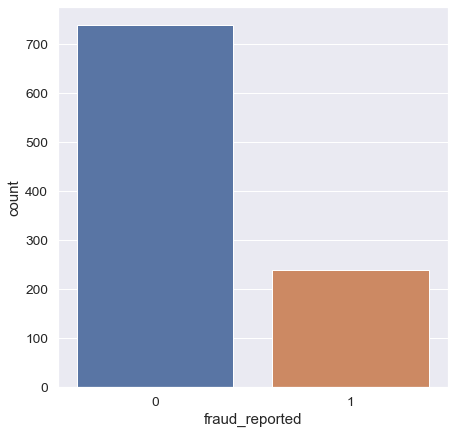

In [31]:
f, ax = plt.subplots(figsize=(7, 7))
sns.countplot(x='fraud_reported',data=df)

Data set is not balanced. hence let is balance it before we start building our model.

## Model Building

In [32]:
#Seperating Target and feature columns
y=df['fraud_reported']
X= df.drop('fraud_reported',axis=1)

In [33]:
#Display of features
X

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1,1,1406.91,1,466132,1,4,17,0,53300,0,2,3,0,4,4,1,5,0,2,1,2,2,71610,6510,13020,52080,10,1,9
1,228,42,1,1,2,1197.22,5,468176,1,4,15,2,0,0,3,0,1,4,5,5,8,0,0,0,0,0,5070,780,780,3510,8,12,12
2,134,29,2,0,2,1413.14,5,430632,0,6,2,3,35100,0,0,2,1,4,1,1,7,2,1,2,3,1,34650,7700,3850,23100,4,30,12
3,256,41,0,1,2,1415.74,6,608117,0,6,2,4,48900,-62400,2,1,0,4,2,0,5,0,0,1,2,1,63400,6340,6340,50720,3,34,19
4,228,44,0,2,1,1583.91,6,610706,1,0,2,4,66000,-46000,3,0,1,2,1,0,20,0,1,0,1,1,6500,1300,650,4550,0,31,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1,1310.80,1,431289,0,5,13,4,0,0,2,1,1,1,0,4,20,0,2,0,1,0,87200,17440,8720,61040,6,6,11
996,285,41,0,0,1,1436.79,1,608177,0,6,17,5,70900,0,2,2,0,1,4,3,23,0,2,2,3,0,108480,18080,18080,72320,13,28,20
997,130,34,2,1,0,1383.49,3,442797,0,5,3,2,35100,0,0,3,1,4,0,0,4,2,0,2,3,2,67500,7500,7500,52500,11,19,1
998,458,62,0,2,2,1356.92,5,441714,1,0,0,5,0,0,2,2,0,3,1,0,2,0,0,0,1,2,46980,5220,5220,36540,1,5,3


#### Let us next scale the numerical data columns

In [34]:
scalar=StandardScaler()
scaled_features=['months_as_customer','age','policy_annual_premium','insured_zip','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']
df[scaled_features] = scalar.fit_transform(df[scaled_features])

In [35]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [64]:
#Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (784, 20)
Number transactions y_train dataset:  (784,)
Number transactions X_test dataset:  (196, 20)
Number transactions y_test dataset:  (196,)


In [65]:
#Checking if SMOTE is capable removing the Imbalance
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  


SM = SMOTE(random_state = 2)
X_train_res, y_train_res = SM.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 191
Before OverSampling, counts of label '0': 593 

After OverSampling, the shape of train_X: (1186, 20)
After OverSampling, the shape of train_y: (1186,) 

After OverSampling, counts of label '1': 593
After OverSampling, counts of label '0': 593


In [66]:
X_train_res.shape

(1186, 20)

In [67]:
#Using Kbest for reference
bestk = SelectKBest(score_func=f_classif,k=20)
fit=bestk.fit(X_train_res,y_train_res)
df_scores=pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train_res.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(20,'Score'))

               Feature_Name       Score
7         incident_severity  520.197202
18            vehicle_claim   69.486413
15       total_claim_amount   65.734306
14  police_report_available   48.721248
17           property_claim   48.668133
11          property_damage   39.078613
6             incident_type   34.143433
8     authorities_contacted   30.792979
2         policy_deductable   27.078802
3               insured_sex   22.389780
16             injury_claim   17.164890
9            incident_state   15.367533
10            incident_city   15.002751
1              policy_state   13.263134
4   insured_education_level   10.599387
12          bodily_injuries    9.146663
5           insured_hobbies    8.362187
19                auto_make    6.661657
13                witnesses    1.569473
0        months_as_customer    0.354347


- Based on certain domain Knowledge and the EDA and the above KBest feature prediction, we have picked the best 21 features, and additionally removed 'policy_csl' as it had a very close entropy value with 'police_report_available'


In [40]:
df1=df.drop(['insured_zip','auto_model','incident_hour_of_the_day','age','policy_annual_premium','umbrella_limit','capital-loss','collision_type','capital-gains','insured_relationship','auto_year','number_of_vehicles_involved','policy_csl'],axis=1)

In [41]:
#Seperating Target and feature columns
y=df1['fraud_reported']
X= df1.drop('fraud_reported',axis=1)

In [68]:

X= X.drop(['months_as_customer','witnesses','auto_make','incident_city','property_claim'],axis=1)

In [158]:
X.columns

Index(['policy_state', 'policy_deductable', 'insured_sex',
       'insured_education_level', 'insured_hobbies', 'incident_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'property_damage', 'bodily_injuries', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'vehicle_claim'],
      dtype='object')

In [75]:
#Function to choose best classification model, its metrics, and random state. 
#including the SMOTE balancing into this loop
mod=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
max_acc_score=0
max_f1score=0
for r_state in range(0,100):
    train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=r_state,test_size=0.2)
    SM = SMOTE(random_state = r_state)
    X_train_res, y_train_res = SM.fit_resample(train_x, train_y.ravel())
    for i in mod:
        
        i.fit(X_train_res,y_train_res)
        pred_y = i.predict(test_x)
        acc_score=accuracy_score(test_y,pred_y)
        f1_Score=f1_score(test_y,pred_y)
        
        
           
        print(i,"Max Accuracy score for random state  ",r_state,"is",acc_score, "with f1 Score ", f1_Score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            max_f1score=f1_Score
            final_state= r_state
            final_model = i
            
            
print("\n\n\n\n\n")
print("Max Acc_score for random state ",final_state,"is",max_acc_score,"and best model is ",final_model, "with f1score as ",max_f1score)

LogisticRegression() Max Accuracy score for random state   0 is 0.7397959183673469 with f1 Score  0.5984251968503937
KNeighborsClassifier() Max Accuracy score for random state   0 is 0.576530612244898 with f1 Score  0.4429530201342282
DecisionTreeClassifier() Max Accuracy score for random state   0 is 0.7448979591836735 with f1 Score  0.5454545454545454
RandomForestClassifier() Max Accuracy score for random state   0 is 0.8112244897959183 with f1 Score  0.6605504587155963
LogisticRegression() Max Accuracy score for random state   1 is 0.6938775510204082 with f1 Score  0.4230769230769231
KNeighborsClassifier() Max Accuracy score for random state   1 is 0.6938775510204082 with f1 Score  0.4230769230769231
DecisionTreeClassifier() Max Accuracy score for random state   1 is 0.8214285714285714 with f1 Score  0.6067415730337079
RandomForestClassifier() Max Accuracy score for random state   1 is 0.8010204081632653 with f1 Score  0.5517241379310344
LogisticRegression() Max Accuracy score for r

- Based on the above prediction, we find that the best random_state at 39, and Random Forest classifier giving us the best result of  Accuracy score of 0.8622448979591837 and f1score of 0.6896551724137931

- let us proceed tp build the model with the above parameters and move towards Hyper Parameter tuning. 

### Initialising the Best model with the predicted best random state.

In [76]:
train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=39,test_size=0.2)
SM = SMOTE(random_state = 39)
X_train_res, y_train_res = SM.fit_resample(train_x, train_y.ravel())
RFC=RandomForestClassifier(random_state = 39)
RFC.fit(X_train_res,y_train_res)
    
    

RandomForestClassifier(random_state=39)

In [77]:
#Metrics
pred_y = RFC.predict(test_x)
acc_score=accuracy_score(test_y,pred_y)

In [94]:
#Comparing Actual and Predicted Values.
compare=pd.DataFrame({'Actual':test_y,'Predicted':pred_y})
compare.sample(10)

,Actual,Predicted
564,0,0
709,1,1
153,0,0
773,0,0
399,0,0
112,0,0
135,1,1
129,1,1
525,0,0
917,0,1


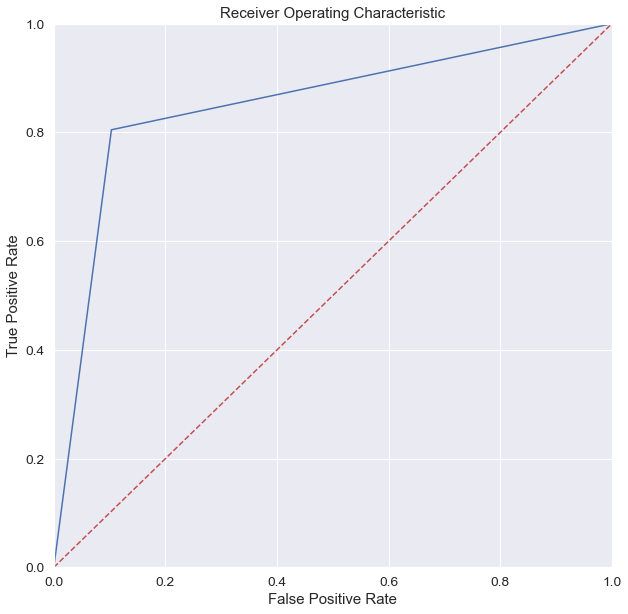

In [95]:
#Ploting ROCb
fpr, tpr, threshold = roc_curve(test_y, pred_y)

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
#plt.legend(loc = 'lower right', )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Hyperparameter Tuning

### 1. Grid Search CV

In [114]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
g_search=GridSearchCV(RFC,param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(X_train_res,y_train_res)
n_neighbor=g_search.best_params_
n_neighbor

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 13}

In [116]:
best_param_grid = {  'bootstrap': [True], 'max_depth': [None], 'max_features': ['auto'], 'n_estimators': [13]}
best_g_search=GridSearchCV(RFC,param_grid = best_param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

best_g_search.fit(X_train_res,y_train_res)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=39), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['auto'], 'n_estimators': [13]},
             return_train_score=True)

In [122]:
GSCV_pred_y = best_g_search.predict(test_x)
acc_score_GSCV=accuracy_score(test_y,GSCV_pred_y)


In [123]:
print(f'Prediction',GSCV_pred_y)
print(f'Accuracy Score',acc_score_GSCV)

Prediction [0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 1 1 0 1 1]
Accuracy Score 0.8520408163265306


### 2. RandomizedSearchCV 

In [119]:
#initialising range of parameters for sequential testing
n_estimators = [int(x) for x in np.linspace(start=20, stop=150, num=50)]
max_depth = [int(x) for x in np.linspace(20, 150, num=25)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [120]:
#Fitting the above range into previously found model
RFC_HPT = RandomForestClassifier(random_state=39)
rf_cv = RandomizedSearchCV(
    estimator=RFC_HPT, param_distributions=param_dist, cv=5, random_state=39)

In [121]:
rf_cv.fit(X_train_res,y_train_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=39),
                   param_distributions={'max_depth': [20, 25, 30, 36, 41, 47,
                                                      52, 57, 63, 68, 74, 79,
                                                      85, 90, 95, 101, 106, 112,
                                                      117, 122, 128, 133, 139,
                                                      144, 150],
                                        'n_estimators': [20, 22, 25, 27, 30, 33,
                                                         35, 38, 41, 43, 46, 49,
                                                         51, 54, 57, 59, 62, 65,
                                                         67, 70, 73, 75, 78, 81,
                                                         83, 86, 88, 91, 94, 96, ...]},
                   random_state=39)

In [100]:
print(f'\nBest parameters are ', rf_cv.best_params_)


Best parameters are  {'n_estimators': 101, 'max_depth': 112}


In [101]:
RFC_best = RandomForestClassifier(max_depth=101, n_estimators=112, random_state=39)
RFC_best.fit(X_train_res,y_train_res)

RandomForestClassifier(max_depth=101, n_estimators=112, random_state=39)

In [124]:
Y_pred_RFC_best = RFC_best.predict(test_x)

In [125]:
RSCV_pred_y = RFC_best.predict(test_x)
acc_score_GSCV=accuracy_score(test_y,RSCV_pred_y)

In [126]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(test_y, RSCV_pred_y) * 100, 2))
print('F1 score:', round(f1_score(test_y, RSCV_pred_y) * 100, 2))

Random Forest Classifier:
Accuracy score: 87.76
F1 score: 72.73


#### We see an increase in accuracy with the Randomised seacrch CV HPT, it has increased to 87.76% from 86.22%

In [132]:
compare2=pd.DataFrame({'Actual':test_y,'Predicted':Y_pred_RFC_best})
#Random Samples-1
compare2.sample(10)

,Actual,Predicted
970,0,0
548,0,0
161,0,0
6,0,0
879,0,0
793,0,0
523,0,0
266,1,1
929,1,1
441,0,0


In [107]:
#Random Samples-2
compare2.sample(10)

,Actual,Predicted
789,0,0
716,0,0
620,1,1
574,1,1
107,0,0
13,0,0
418,0,0
462,1,1
879,0,0
202,0,0


## Hence we can see that we have fine tuned the model to compensate for overfitting.
- Let us now look at other metrics

<h3><font color='maroon'><u>Metrics for the Classification Problem</u></font></h3>

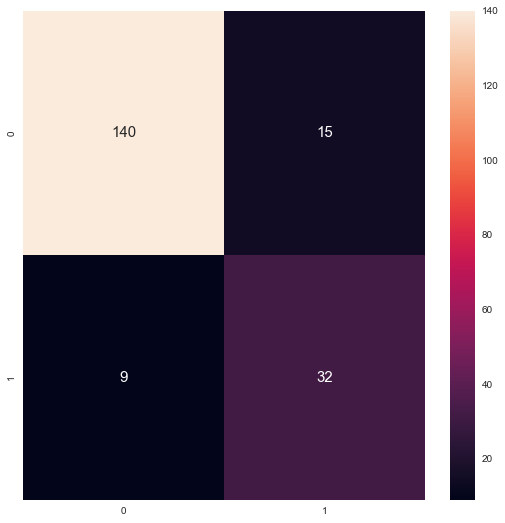

In [133]:
#After the HPT, lets look at the confusion matrix, to look at the number of True Positives...
Conf_mat = confusion_matrix(test_y, Y_pred_RFC_best)

plt.style.use('seaborn')
plt.figure(figsize=(9, 9))
sns.heatmap(Conf_mat, annot=True, fmt='d')
plt.show()

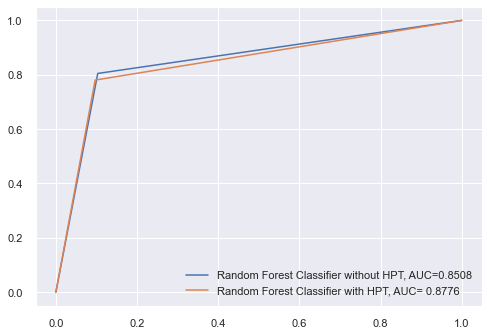

In [160]:
#set up plotting area
plt.figure(0).clf()

#fit ROC before 

y_predd = RFC.predict_proba(test_x)[:, 1]
fpr1, tpr1, _ = roc_curve(test_y, pred_y)
auc1 = round(roc_auc_score(test_y, pred_y), 4)
plt.plot(fpr1,tpr1,label="Random Forest Classifier without HPT, AUC="+str(auc1))

#fit gradient boosted model and plot ROC curve

y_predd2 = RFC_best.predict_proba(test_x)[:, 1]
fpr2, tpr2, _ = roc_curve(test_y, RSCV_pred_y)
auc2 = round(roc_auc_score(test_y, RSCV_pred_y), 4)
plt.plot(fpr2,tpr2,label="Random Forest Classifier with HPT, AUC= "+str(auc2))

#add legend
plt.legend()

In [136]:
#Finally lets look at the classification report

print(classification_report(test_y, RSCV_pred_y))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       155
           1       0.68      0.78      0.73        41

    accuracy                           0.88       196
   macro avg       0.81      0.84      0.82       196
weighted avg       0.89      0.88      0.88       196



## Summary

- We have finally achieved success in the prediction of an insurance fraud, where we have an accuracy of about 84%
- The classification report is shown above for a more detail analysis.
- From the ROC curve we have more or less achieved a right angle L, which further strengthens our finding.
- between the Y/N in the target column, the model has better chances of predicting a "N", than calling it a fraud.
- Basically this model can basically say that 94% of the time its prediction of a "N" being a negative for fraudualant claim. which is a good thing.